# IL027: Computer Modelling for All
## Introduction to quantum mechanics

### Scott Habershon, Department of Chemistry

## Overview

Quantum mechanics is the set of rules which govern how microscopic systems, namely atoms, molecules and electrons, behave. In the first part of this brief introduction to quantum mechanics, we went over the basic postulates of quantum mechanics; in this section, we're going to look at some computational schemes which can be used to calculate allowed quantum-mechanical states (and their energies), and to propagate wavefunctions in time.

If you have any knowledge of finite elements and grid-based solvers, some of the methods we discuss here might be familiar to you as spectral or pseudo-spectral methods; if you're not familiar with these terms, don't worry - the practical implementation of the grid-based methods we're using is very straightforward.


## Solving the Schrodinger equation using the discrete variable representation (DVR)

First, we're going to use the discrete variable representation (DVR) as the basis of a simple program which will enable us to calculate the allowed eigenvalues (*i.e.* energies) and eigenfunctions for some one-dimensional problems. Later, we'll see how DVR can be used as a basis for a method for *propagating* wavefunctions.

### Solving the Schrodinger equation with a basis set

Following on from the lectures, we will suppose that we are interested in a particle of mass $m$ moving in 1-dimension $x$. If the *potential energy* function that the particle moves in is $V(x)$, then the total Hamiltonian of the system is:

$$
\hat{H} = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{dx^{2}} + V(x).
$$

The allowed states of the system are those which satisfy the *time-independent Schrodinger equation*, given by

$$
\hat{H} \psi_{i}(x) = E_{i} \psi_{i}(x).
$$

In other words, there are a number of allowed states (or eigenfunctions) $\psi_{i}(x)$, each with a corresponding energy (or eigenvalue) $E_{i}$. 

**Our aim is to determine the allowed solution** $\psi_{i}(x)$ **and** $E_{i}$. **The DVR method is a simple way of doing this...** 

Now, suppose we assume that the eigenfunction $\psi_{i}(x)$ can be written as a linear combination of *basis functions*:

$$
\psi_{i}(x) = \sum_{j=1}^{N} c_{ji} \phi_{j}(x)
$$

where $c_{ij}$ is an expansion coefficient. For simplicity, we assume that we're using *orthonormal* basis functions, which means

$$
\int \phi_{i}^{*}(x) \phi_{j}(x) \, dx = \delta_{ij} 
$$

Substituting our linear expansion into the time-independent Schrodinger equation gives:

$$
\sum_{j=1}^{N} c_{ji} \hat{H} \phi_{j} = E_{i} \sum_{k=1}^{N} c_{ki} \phi_{k}
$$

Now, multiplying each side from the left by $\phi_{m}(x)$, integrating over all $x$ and taking advantage of the orthonormality mentioned above, we find that the Schrodinger equation for $N$ eigenstates can be written as

$$
\mathbf{Hc} = \mathbf{Ec}
$$

where $\mathbf{H}$ is an $N \times N$ Hamiltonian matrix, with elements

$$
H_{ij} = \int \phi_{i}^{*}(x) \hat{H} \phi_{j}(x) \, dx = \int \phi_{i}^{*}(x) \hat{T} \phi_{j}(x) \, dx + \int \phi_{i}^{*}(x) \hat{V} \phi_{j}(x) \, dx = T_{ij} + V_{ij}
$$

$\mathbf{c}$ is the $N \times N$ matrix of expansion coefficients; column $j$ in $\mathbf{c}$ gives us the expansion coefficients of the $N$ basis functions for eigenstate $j$. Finally, $\mathbf{E}$ is a *diagonal* matrix whose elements are simply the eigenvalues (or energies) of the eigenstates $E_{i}$.

Solving $\mathbf{Hc} = \mathbf{Ec}$ to find $\mathbf{c}$ and $\mathbf{E}$ is a standard exercise in linear algebra; technically, this is simply an eigenproblem, and there are lots of well established methods for solution. The only remaining thing we need to consider is the choice of basis functions to allow us to readily evaluate the matrix elements $T_{ij}$ and $V_{ij}$....

## Colbert-Miller DVR 
#### See: D. T. Colbert and W. H. Miller, *J. Chem. Phys.*, **96**, 1982 (1992).

The Colbert-Miller DVR is a particularly simple (and hence attractive) DVR scheme. We won't go through the details here, but the Colbert-Miller DVR scheme can be viewed as using basis functions which are of the form:

$$
\phi_{j}(x) = \sum_{-K}^{K} \frac{e^{i k (x-j\Delta x)}}{\sqrt{2 K}},
$$

where $K = \frac{\pi}{\Delta x}$ and $\Delta x$ is the uniform grid-spacing. These basis functions are essentially Fourier sums over different components $k$...let's have a look what they look like:


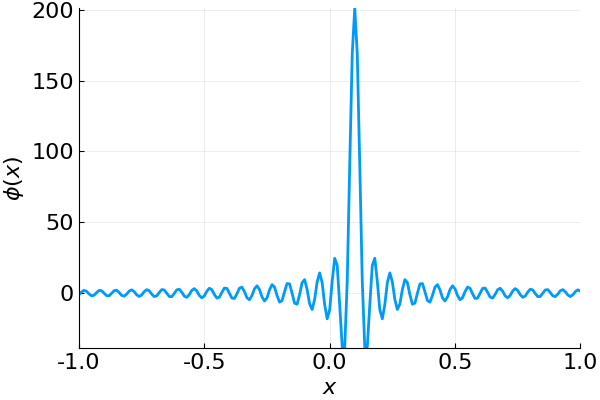

In [353]:
using Plots
using LaTeXStrings
font = Plots.font("Helvetica", 16)
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)

# Set up a uniform grid on [-1,1] with ngrid grid-points.
Xmax = 1.0
Xmin = -1.0
Length = Xmax - Xmin
ngrid = 201

# Set the maximum k value - increase this to get a more "delta" delta function!
kmax = 100

# Plot the function centered at x=xloc.
xloc = 0.1
x = linspace(Xmin,Xmax,ngrid)
y = zeros(Complex, ngrid)
for i in -kmax:kmax
    y .+= exp.(im * i * (x-xloc))
end

plot(x, real(y), xlim=[Xmin,Xmax],
     xlabel=L"x", ylabel=L"$\phi(x)$",
     lw=2, legend=false)


We see that these basis functions  look like $\delta$-functions centered on each of the positions in the uniform grid; as a result, there are $N$ of these basis functions supported on a uniform grid of $N$ points. 

The Colbert-Miller DVR scheme uses these basis functions, but takes the limit $k \rightarrow \infty$ explicitly when evaluating matrix elements; this is sort of like taking the limit of a infinitely-closely spaced uniform grid. 

The maths is tedious, but the upshot is that the matrix elements in the Colbert-Miller DVR method can be evaluated as follows:

$$
H_{ij} = T_{ij} + V_{ij}
$$

$$
V_{ij} = V(x_{i}) \delta_{ij}
$$

\begin{equation}
\begin{split}
T_{ij} &= \frac{\hbar^{2} (-1)^{(i-j)} \pi^{2}}{6m \Delta x^{2}} \hspace{2cm} \text{if i = j} \\ \\
& = \frac{\hbar^{2} (-1)^{(i-j)} }{m \Delta x^{2} (i-j)^2} \hspace{2cm} \text{if i $\neq$ j}
\end{split}
\end{equation}

Using these equations, it is straightforward to calculate the Hamiltonian matrix elements $H_{ij}$, and to then find the eigenvectors and eigenvalues.


## Example 1: Harmonic oscillator eigenstates and eigenvalues

The potential energy in the 1-D harmonic oscillator is

$$
V(x)=\frac{1}{2}kx^{2} = \frac{1}{2} m \omega^{2} x^{2}
$$

The term  $k$ is the spring constant, which is related to the natural frequency of the oscillator, $\omega$, according to

$$
\omega = \sqrt{\frac{k}{m}}.
$$

The Hamiltonian operator is then

$$
H = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{d x^{2}} + \frac{1}{2} kx^{2}.
$$

The harmonic oscillator is a nice problem because we *know* exactly what the correct eigenfunctions and eigenvalues are (in other words, this is an analytically solvable model). In particular, it turns out that the allowed energy levels of the quantum harmonic oscillator are:

$$
E_{n} = (n+\frac{1}{2}) \hbar \omega, \hspace{3cm} n = 0, 1, 2, \dots
$$

Here, $n$ is a quantum number which identifies the state of the system; the energy spacing between any two adjacent quantum states is $\hbar \omega$.

The eigenfunctions $\psi_{n}(x)$ are all Gaussian functions multipled by *Hermite polynomials*; to see what they look like, consider the following probability distributions:


In [354]:
# Plot of first 4 harmonic oscillator eigenstates (ignoring normalization constants, etc.)
#

# Set up a uniform grid:
Length = 5.0
ngrid = 100
x = linspace(-Length, Length, ngrid)
dx = x[2] - x[1]

# Create array containing first 4 harmonic oscillator eigenstates.
y = zeros(4, ngrid)
y[1, :] = exp.(-0.5x.^2)
y[2, :] = exp.(-0.5x.^2) .* x
y[3, :] = exp.(-0.5x.^2) .* (2*x.^2 - 1)
y[4, :] = exp.(-0.5x.^2) .* (2*x.^3 - 3*x)

# Normalize each function.
for n=1:4
    y[n, :] ./= sqrt(sum(y[n, :].^2 * dx))
end


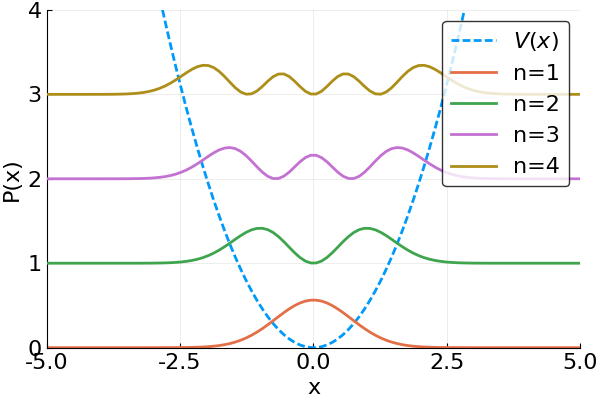

In [355]:
p = plot(x, 0.5*x.^2, label=L"V(x)", 
         xlabel="x", ylabel="P(x)", lw=2, 
         linestyle=:dash, legend=:topright, xlims=(-5, 5), ylims=(0, 4))
for n=1:4
    plot!(x, y[n, :].^2 + (n-1), lw=2, label="n=$n")
end
display(p)

So, now lets run the Colbert-Miller DVR solution of this problem....

In [356]:
# Set up harmonic oscillator properties - we'll use atomic units, where hbar = 1.0.
#
kspring = 1.0
mass = 1.0
hbar = 1.0

# Set up the uniform grid:
Xmax = 5.0
Xmin = -5.0
Length = Xmax - Xmin
ngrid = 201
x = linspace(Xmin, Xmax, ngrid)
dx = x[2] - x[1]

#
# COLBERT-MILLER DVR HAMILTONIAN CONSTRUCTION.
#
# Set up potential energy matrix.
V = zeros(ngrid, ngrid)
for i = 1:ngrid
    V[i, i] = 0.5 * kspring * x[i]^2
end
diagind

# Set up kinetic energy matrix.
T = zeros(ngrid, ngrid)
for i = 1:ngrid
    for j = 1:ngrid
        if i == j
            T[i, j] = ((hbar^2) * (-1.0)^(i-j) * π^2) / (6 * mass * dx^2 ) 
        else
            T[i, j] = ((hbar^2) * (-1.0)^(i-j)) / (mass * dx^2 * (i-j)^2 )
        end
    end
end

# Create the Hamiltonian matrix:
H = T + V;

We can have a look at the $T$, $V$ and $H$ matrices with the `spy()` plot routine:


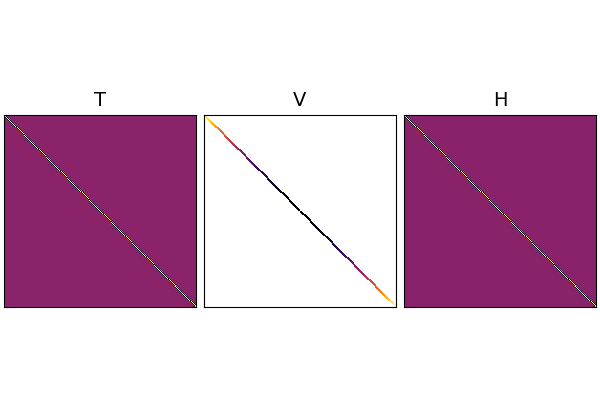

In [357]:
plot(spy(T), spy(V), spy(H), layout=(1, 3), colorbar=false, 
     title=["T" "V" "H"], xticks=nothing, yticks=nothing)

In [358]:
# Solve the eigenvalue problem
E, c = eig(H)

# Print out the first few energy eigenvalues:
@show E[1]
@show E[2]
@show E[3]
@show E[4]

E[1] = 0.5000000000497092
E[2] = 1.5000000024258369
E[3] = 2.500000056589813
E[4] = 3.500000839551121


3.500000839551121

We are using atomic units here (so $\hbar = 1$), and we chose the spring constant and mass of the problem such that $\omega = 1$; this means the expected energy spectrum is $E_{0} = 0.5$, $E_{1} = 1.5$, $E_{2} = 2.5$, and so on. This is exactly what we've calculated above!

** But what about the eigenvectors? Do they look as expected? **


First, it is useful to normalize each eigenfunction such that

$$
\int \, \psi_{i}^{*}(x) \psi_{i}(x) \, dx = 1.
$$

Using simple quadrature, this integral can be evaluated on the uniform grid as

$$
\sum_{j=1}^{N} \psi_{i}^{*}(x_{j}) \psi(x_{j}) \Delta x,
$$

where $\Delta x$ is the grid spacing.

In [359]:
# Normalize each eigenfunction using simple quadrature.
for i = 1:ngrid  
    c[:, i] ./= sqrt(sum(c[:, i].^2 * dx))
end

Now we can plot the DVR eigenvectors.....


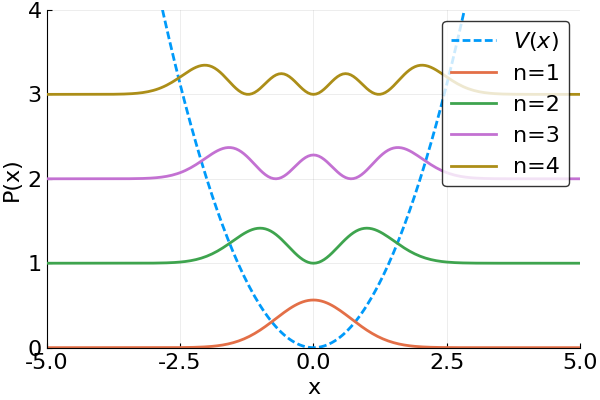

In [360]:
p = plot(x, 0.5*x.^2, label=L"V(x)", 
         xlabel="x", ylabel="P(x)", lw=2, 
         linestyle=:dash, legend=:topright, xlims=(-5, 5), ylims=(0, 4))
for n=1:4
    plot!(x, c[:, n].^2 + (n-1), lw=2, label="n=$n")
end
display(p)

If you compare the Figure above to the Figure in which we plotted the *analytical* eigenstates for the harmonic oscillator, you'll see that the results are identical!

The conclusion of the above is that the Colbert-Miller DVR code is a convenient numerical method of giving us the eigenvectors and eigenvalues of any 1-dimensional potential. In the *Assignement* for this course, you'll write your won Colbert-Miller code to find the eigenvectors and eigenvalues for a double-well potential energy function.

## Example 2: Quantum dynamics with known eigenvectors

Once we know the eigenvectors and eigenvalues of the system of interest, performing the time-evolution of any initial wavefunction becomes straightforward.

In particular, recall from the first Lecture that the time-dependent Schrodinger equation is

$$
i \hbar \frac{d \psi(x,t)}{dt} = \hat{H} \psi(x,t).
$$

If the system is in some eigenstate $\psi_{i}(x)$ with energy $E_{i}$, then

$$
\hat{H} \psi_{i}(x,t) = E_{i} \psi_{i}(x,t),
$$
so the time-dependent Schrodinger equation becomes

$$
i \hbar \frac{d \psi(x,t)}{dt} = E_{i} \psi(x,t).
$$

the formal solution of which is

$$
\psi(x,t) = e^{-\frac{i E_{i} t}{\hbar}} \psi_{i}(x,0).
$$

It follows that, if a wavefunction can be written as a linear combination of eigenfunctions

$$
\psi_{x} = \sum_{j=1}^{N} c_{j} \phi_{j}(x),
$$

where

$$
\hat{H} \phi_{j} = E_{j} \phi_{j},
$$

then the wavefunction at time $t$ is also a linear combination of eigenfunctions, albeit weighted by different phase  terms arising due to the different energy eigenvalues.

$$
\psi(x,t) = \sum_{j=1}^{N} c_{j} e^{-\frac{i E_{j} t}{\hbar} } \phi_{j}(x) = \sum_{j=1}^{N} c_{j}(t) \phi_{j}(x),
$$

where we have defined the time-dependent coefficients $c_{j}(t)$. Another way of looking at this is that the coefficients $c_{j}$ oscillate with a phase factor $e^{-\frac{i E_{j} t}{\hbar} }$.


### Choice of initial coefficients

How do we choose the initial coefficients $c_{j}(0)$? Suppose we want our linear combination of eigenvectors to represent some wavefunction $\chi(x)$ at time $t=0$:

$$
\chi(x) = \sum_{j=1}^{N} c_{j}(0) \phi_{j}(x)
$$

To find each of the initial coefficients, we simply multiply both sides of the above $\phi^{*}_{m}(x)$ and integrate over $x$; because of the orthonormality of the eigenvectors (see above), the result is that the coefficient $c_{m}(0)$ is given by

$$
c_{m}(0) = \int \phi_{m}^{*}(x) \chi(x) \, dx \simeq \sum_{j=1}^{N} \phi_{m}^{*}(x_{j}) \chi(x_{j}) \Delta x,
$$

where the second equation is the simple quadrature approximation to the integral evaluated on a uniform grid of $N$ points.

We can obviously write down one of these equations for each of the $N$ basis functions, giving us the initial set of coefficients; once we know these, we can propagate the wavefunction as described above.





### Application to harmonic oscillator

Let's use our harmonic oscillator states to propagate a wavefunction. We'll suppose that the initial wavefunction is a Gaussian function centered at $\mu = -2.5$:

$$
\chi(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^{2}}{2 \sigma^{2}}}
$$

** What does the wavefunction look like as a function of time? **

First, let's plot the initial wavefunction....

In [364]:
# Initialize wavefunction on grid.
sigma = 0.5
mu = -2.5
chi = (1.0/(sigma*(sqrt(2*π)))) * exp.(-0.5 * (x - mu).^2/sigma^2)
plot(x, 0.5*x.^2, linewidth=2.5, linestyle=:dash, xlabel="x", ylabel="P(x)",
        ylims=[0,4], xlabel="x", legend=false)
plot!(x, chi, fillrange=0, fillcolor=:green, alpha=0.5, color=:black, lw=3)
title!("Initial wavefunction before propagation")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 Initial wavefunction before propagation 
 
 
 x 
 
 
 P(x) 
 
<polyline clip-path="url(#clip2502)" style="stroke:#009af9; stroke-width:2.5; stroke-opacity:1; fill:none" stroke-dasharray="10, 6" points="
 44.6753,-648.782 47.3535,-628.874 50.0317,-609.166 52.7099,-589.658 55.3881,-570.35 58.0663,-551.242 60.7445,-532.334 63.4227,-513.627 66.1009,-495.119 68.7791,-476.812 
 71.4573,-458.704 74.1355,-440.797 76.8137,-423.09 79.4919,-405.583 82.1701,-388.275 84.8483,-371.169 87.5265,-354.262 90.2047,-337.555 92.8829,-321.048 95.5611,-304.741 
 98.2393,-288.635 100.917,-272.728 103.596,-257.022 106.274,-241.516 108.952,-226.209 111.63,-211.103 114.308,-196.197 116.987,-181.491 119.665,-166.985 122.343,-152.679 
 125.021,-138.573 127.699,-124.668 130.378,-110.962 133.056,-97.4566 135.734,-84.1512 138.412,-71.0458 141.09,-58.1406 143.769,-45.4354 146.447,-32.9303 149.125,-20.6252 
 151.803,-8.52029 154.481,3.38457 157.16,15.0894 159.838,26.5941 162.516,37.8987 165.194,49.0032 167.872,59.9077 170.551,70.612 173.229,81.1163 175.907,91.4206 
 178.585,101.525 181.263,111.429 183.942,121.133 186.62,130.637 189.298,139.94 191.976,149.044 194.654,157.948 197.333,166.651 200.011,175.155 202.689,183.458 
 205.367,191.561 208.045,199.465 210.724,207.168 213.402,214.671 216.08,221.974 218.758,229.077 221.436,235.98 224.115,242.682 226.793,249.185 229.471,255.488 
 232.149,261.59 234.827,267.493 237.506,273.195 240.184,278.697 242.862,283.999 245.54,289.101 248.218,294.003 250.897,298.705 253.575,303.207 256.253,307.509 
 258.931,311.611 261.609,315.512 264.288,319.214 266.966,322.715 269.644,326.016 272.322,329.118 275,332.019 277.679,334.72 280.357,337.221 283.035,339.522 
 285.713,341.623 288.391,343.524 291.07,345.224 293.748,346.725 296.426,348.025 299.104,349.126 301.782,350.026 304.461,350.727 307.139,351.227 309.817,351.527 
 312.495,351.627 315.173,351.527 317.852,351.227 320.53,350.727 323.208,350.026 325.886,349.126 328.564,348.025 331.243,346.725 333.921,345.224 336.599,343.524 
 339.277,341.623 341.955,339.522 344.634,337.221 347.312,334.72 349.99,332.019 352.668,329.118 355.346,326.016 358.025,322.715 360.703,319.214 363.381,315.512 
 366.059,311.611 368.737,307.509 371.416,303.207 374.094,298.705 376.772,294.003 379.45,289.101 382.128,283.999 384.806,278.697 387.485,273.195 390.163,267.493 
 392.841,261.59 395.519,255.488 398.197,249.185 400.876,242.682 403.554,235.98 406.232,229.077 408.91,221.974 411.588,214.671 414.267,207.168 416.945,199.465 
 419.623,191.561 422.301,183.458 424.979,175.155 427.658,166.651 430.336,157.948 433.014,149.044 435.692,139.94 438.37,130.637 441.049,121.133 443.727,111.429 
 446.405,101.525 449.083,91.4206 451.761,81.1163 454.44,70.612 457.118,59.9077 459.796,49.0032 462.474,37.8987 465.152,26.5941 467.831,15.0894 470.509,3.38457 
 473.187,-8.52029 475.865,-20.6252 478.543,-32.9303 481.222,-45.4354 483.9,-58.1406 486.578,-71.0458 489.256,-84.1512 491.934,-97.4566 494.613,-110.962 497.291,-124.668 
 499.969,-138.573 502.647,-152.679 505.325,-166.985 508.004,-181.491 510.682,-196.197 513.36,-211.103 516.038,-226.209 518.716,-241.516 521.395,-257.022 524.073,-272.728 
 526.751,-288.635 529.429,-304.741 532.107,-321.048 534.786,-337.555 537.464,-354.262 540.142,-371.169 542.82,-388.275 545.498,-405.583 548.177,-423.09 550.855,-440.797 
 553.533,-458.704 556.211,-476.812 558.889,-495.119 561.568,-513.627 564.246,-532.334 566.924,-551.242 569.602,-570.35 572.28,-589.658 574.959,-609.166 577.637,-628.874 
 580.315,-648.782 
 "/>
<polygon clip-path="url(#clip2502)" points="
44.6753,351.627 47.3535,351.627 50.0317,351.626 52.7099,351.626 55.3881,351.625 58.0663,351.624 60.7445,351.623 63.4227,351.621 66.1009,351.617 68.7791,351.613 
 71.4573,351.605 74.1355,351.595 76.8137,351.58 79.4919,351.559 82.1

Now, we've already calculated the eigenvectors for the harmonic potential; we'll write the time-evolving wavefunction as a linear combination of these eigenvectors.

We just need to work out the initial expansion coefficients, as described above; we'll also plot the wavefunction as represented by the linear combination against the original wavefunction to check that they match...


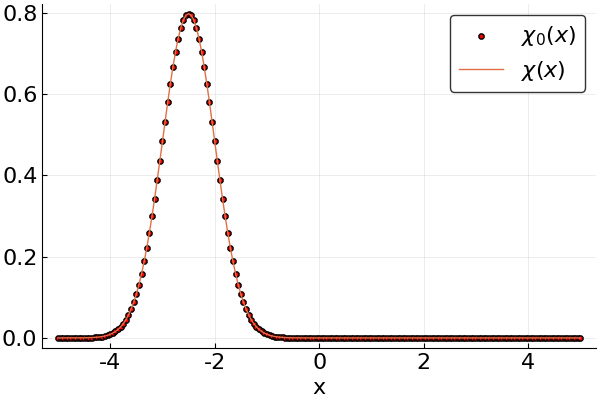

In [367]:
# Calculate the expansion coefficients of each eigenvector using simple integration.
#
coeff = zeros(Complex, ngrid)
for i = 1:ngrid
    coeff[i] = sum(chi .* c[:, i]) * dx
end

# Plot the initial wavefunction, as described by the linear combination of eigenvectors - 
# this should be the same as the Gaussian above.
#
chi0 = zeros(Complex, ngrid)
for i = 1:ngrid
    chi0[i] = sum(coeff .* c[i, :])
end

pyplot()
scatter(x, real(chi0), color=:red, marker=:o, label=L"\chi_0(x)")
plot!(x, chi, xlabel="x", label=L"\chi(x)")

Now we know the initial coefficients, we can plot the wavefunction at ANY later time $t$! Let's try it...

In [368]:
# Define a function to compute wavefunction at time t
wavefunction(t) = sum(c[:, j] * coeff[j] * exp.(-im * E[j] * t/hbar) for j=1:ngrid)

# Let's plot the wavefunction over time from t = 0.0 to 3.0.
gr() # use GR backend for animations as it's faster than pyplot
for tt in 0.0:0.05:3.0
    p = plot(x, [0.5*x.^2 abs.(wavefunction(tt))], lw=3, legend=false,
              linestyle=[:dash :solid], color=[:blue :black], xlabel="x", ylabel="P(x)",
              fillrange=[0 0], fillcolor=[:white :green], alpha=0.5, ylim=(0, 2))
    IJulia.clear_output(true)
    display(p)
    sleep(0.1)
end

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 x 
 
 
 P(x) 
 
<polygon clip-path="url(#clip6902)" points="
64.4442,-1772.22 67.0236,-1729.96 69.6029,-1688.12 72.1823,-1646.7 74.7616,-1605.71 77.341,-1565.15 79.9203,-1525.01 82.4997,-1485.29 85.079,-1446 87.6584,-1407.13 
 90.2377,-1368.69 92.8171,-1330.67 95.3965,-1293.08 97.9758,-1255.91 100.555,-1219.17 103.135,-1182.85 105.714,-1146.96 108.293,-1111.49 110.873,-1076.45 113.452,-1041.83 
 116.031,-1007.64 118.611,-973.867 121.19,-940.523 123.769,-907.603 126.349,-875.108 128.928,-843.038 131.507,-811.393 134.087,-780.172 136.666,-749.377 139.245,-719.005 
 141.825,-689.059 144.404,-659.538 146.984,-630.441 149.563,-601.769 152.142,-573.522 154.722,-545.699 157.301,-518.302 159.88,-491.329 162.46,-464.781 165.039,-438.657 
 167.618,-412.959 170.198,-387.685 172.777,-362.836 175.356,-338.412 177.936,-314.412 180.515,-290.837 183.094,-267.688 185.674,-244.962 188.253,-222.662 190.833,-200.786 
 193.412,-179.335 195.991,-158.309 198.571,-137.708 201.15,-117.531 203.729,-97.7796 206.309,-78.4526 208.888,-59.5503 211.467,-41.0728 214.047,-23.0201 216.626,-5.39216 
 219.205,11.811 221.785,28.5894 224.364,44.9431 226.943,60.8719 229.523,76.376 232.102,91.4554 234.682,106.11 237.261,120.34 239.84,134.145 242.42,147.525 
 244.999,160.48 247.578,173.011 250.158,185.117 252.737,196.798 255.316,208.055 257.896,218.886 260.475,229.293 263.054,239.275 265.634,248.833 268.213,257.965 
 270.793,266.673 273.372,274.956 275.951,282.814 278.531,290.248 281.11,297.256 283.689,303.84 286.269,309.999 288.848,315.734 291.427,321.043 294.007,325.928 
 296.586,330.388 299.165,334.424 301.745,338.034 304.324,341.22 306.903,343.981 309.483,346.317 312.062,348.229 314.642,349.715 317.221,350.777 319.8,351.415 
 322.38,351.627 324.959,351.415 327.538,350.777 330.118,349.715 332.697,348.229 335.276,346.317 337.856,343.981 340.435,341.22 343.014,338.034 345.594,334.424 
 348.173,330.388 350.752,325.928 353.332,321.043 355.911,315.734 358.491,309.999 361.07,303.84 363.649,297.256 366.229,290.248 368.808,282.814 371.387,274.956 
 373.967,266.673 376.546,257.965 379.125,248.833 381.705,239.275 384.284,229.293 386.863,218.886 389.443,208.055 392.022,196.798 394.601,185.117 397.181,173.011 
 399.76,160.48 402.34,147.525 404.919,134.145 407.498,120.34 410.078,106.11 412.657,91.4554 415.236,76.376 417.816,60.8719 420.395,44.9431 422.974,28.5894 
 425.554,11.811 428.133,-5.39216 430.712,-23.0201 433.292,-41.0728 435.871,-59.5503 438.451,-78.4526 441.03,-97.7796 443.609,-117.531 446.189,-137.708 448.768,-158.309 
 451.347,-179.335 453.927,-200.786 456.506,-222.662 459.085,-244.962 461.665,-267.688 464.244,-290.837 466.823,-314.412 469.403,-338.412 471.982,-362.836 474.561,-387.685 
 477.141,-412.959 479.72,-438.657 482.3,-464.781 484.879,-491.329 487.458,-518.302 490.038,-545.699 492.617,-573.522 495.196,-601.769 497.776,-630.441 500.355,-659.538 
 502.934,-689.059 505.514,-719.005 508.093,-749.377 510.672,-780.172 513.252,-811.393 515.831,-843.038 518.41,-875.108 520.99,-907.603 523.569,-940.523 526.149,-973.867 
 528.728,-1007.64 531.307,-1041.83 533.887,-1076.45 536.466,-1111.49 539.045,-1146.96 541.625,-1182.85 544.204,-1219.17 546.783,-1255.91 549.363,-1293.08 551.942,-1330.67 
 554.521,-1368.69 557.101,-1407.13 559.68,-1446 562.259,-1485.29 564.839,-1525.01 567.418,-1565.15 569.998,-1605.71 572.577,-1646.7 575.156,-1688.12 577.736,-1729.96 
 580.315,-1772.22 580.315,351.627 577.736,351.627 575.156,351.627 572.577,351.627 569.998,351.627 567.418,351.627 564.839,351.627 562.259,351.627 559.68,351.627 
 557.101,351.627 554.521,351.627 551.942,351.627 549.363,351.627 546.783,351.627 544.204,351.627 541.625,351.627 539.045,351.627 536.466,351.627 533.887,351.627 
 531.307,351.627 528.728,351.627 526.149,351.627 523.569,351.627 520.99,351.6

## Summary

In this section, we learnt about how we can solve the Schrodinger equation for simple 1-dimensional systems, and how we can propagate wavefunctions once we know the eigenvectors and eigenvalues.

In the assessed work, you will build on these methods; first, you'll implement your own Colbert-Miller DVR for a different 1-dimensional model system, and you'll also learn about the split-operator Fourier transform method for propagating wavefunctions *without* requiring the eigenfunctions.
